This sample demonstrates celebrity face classification using Keras with transfer learning

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
# print(os.listdir("../input"))
# print(os.listdir("../input/keras-pretrained-models/"))

data_dir = 'C:\\Users\\DELL\\Downloads\\Celebrity'
vgg16weight = './vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'
resnet50weight = './resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'

In [2]:

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model, Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import SGD,RMSprop
# from keras.optimizers import RMSprop, SGD
from keras import backend as K
import tensorflow as tf
import keras

import matplotlib.pyplot as plt

### 1. Prepare Data

In [3]:
img_width, img_height = 200, 200

train_data_dir = os.path.join(data_dir, 'train/')
validation_data_dir = os.path.join(data_dir, 'val/')
nb_train_samples = 93
nb_validation_samples = 25
epochs = 50
batch_size = 16
numclasses = 5

In [4]:
# dataset
# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
    zoom_range = 0.1, # Randomly zoom image 
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    #shear_range=0.2,
    vertical_flip=False,
    horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 93 images belonging to 5 classes.
Found 25 images belonging to 5 classes.


### 2. Model

In [5]:
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [6]:
def vgg16CNNtl(input_shape, outclass, sigma='sigmoid'):
    
    base_model = None
    base_model = tf.keras.applications.VGG16(weights=None, include_top=False, input_shape=input_shape)
    base_model.load_weights(vgg16weight)
        
    top_model = Sequential()
    top_model.add(Flatten(input_shape=base_model.output_shape[1:]))
    for i in range(2):
        top_model.add(Dense(4096, activation='relu'))
        top_model.add(Dropout(0.5))
    top_model.add(Dense(outclass, activation=sigma))

    model = None
    model = Model(inputs=base_model.input, outputs=top_model(base_model.output))
    
    return model
 
def resnet50tl(input_shape, outclass, sigma='sigmoid'):
    
    base_model = None
    base_model = tf.keras.applications.resnet50.ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)
    # base_model.load_weights(resnet50weight)
    
    top_model = Sequential()
    top_model.add(Flatten(input_shape=base_model.output_shape[1:]))
    for i in range(2):
        top_model.add(Dense(4096, activation='relu'))
        top_model.add(Dropout(0.5))
    top_model.add(Dense(outclass, activation=sigma))

    model = None
    model = Model(inputs=base_model.input, outputs=top_model(base_model.output))
    
    return model


In [7]:
model = vgg16CNNtl(input_shape, numclasses, 'softmax')
lr = 1e-5
decay = 1e-7 #0.0
optimizer = RMSprop(lr=lr, decay=decay)
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizer_v2\rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


### 3. Train

In [8]:
import keras
model = keras.models.load_model('./model_kg_1.h5')

In [9]:
for i in range(5):
    history = model.fit(
        train_generator,
        steps_per_epoch=nb_train_samples // batch_size,
        epochs=10,
        validation_data=validation_generator,
        validation_steps=nb_validation_samples // batch_size)
    model.save('model_kg_'+str(i+1)+'.h5')

Epoch 1/10
5/5 [==============================] - 64s 9s/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.2448 - val_accuracy: 0.9375
Epoch 2/10
5/5 [==============================] - 44s 9s/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.1533 - val_accuracy: 0.9375
Epoch 3/10
5/5 [==============================] - 49s 10s/step - loss: 0.0294 - accuracy: 0.9870 - val_loss: 0.0865 - val_accuracy: 0.9375
Epoch 4/10
5/5 [==============================] - 53s 11s/step - loss: 0.0227 - accuracy: 0.9875 - val_loss: 0.2786 - val_accuracy: 0.9375
Epoch 5/10
5/5 [==============================] - 47s 10s/step - loss: 0.0084 - accuracy: 1.0000 - val_loss: 0.1172 - val_accuracy: 0.9375
Epoch 6/10
5/5 [==============================] - 55s 12s/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.1450 - val_accuracy: 0.9375
Epoch 7/10
5/5 [==============================] - 47s 9s/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.1987 - val_accuracy: 0.8750
Epoch 8/10
5/5 [==============

In [10]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

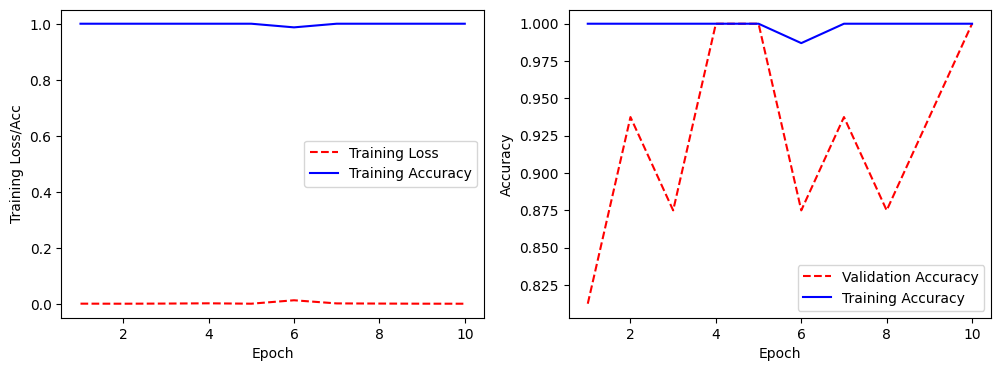

In [11]:
# model.save('model.h5')
# Get training and test loss histories
training_loss = history.history['loss']
training_acc = history.history['accuracy']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

fig=plt.figure(figsize=(12, 4))
# Visualize loss history
fig.add_subplot(121)
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, training_acc, 'b-')
plt.legend(['Training Loss', 'Training Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Training Loss/Acc')

# Get training and test loss histories
val_acc = history.history['val_accuracy']
training_acc = history.history['accuracy']

# Create count of the number of epochs
epoch_count = range(1, len(val_acc) + 1)

# Visualize loss history
fig.add_subplot(122)
plt.plot(epoch_count, val_acc, 'r--')
plt.plot(epoch_count, training_acc, 'b-')
plt.legend(['Validation Accuracy', 'Training Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.show();

In [12]:
saveweight =  'celebriytag_weight.h5'
model.save_weights(saveweight)

### 4. Evaluation

In [13]:
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from io import BytesIO
import cv2
import requests
import os

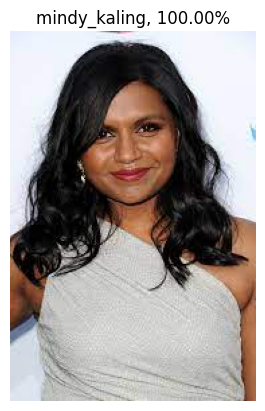

In [30]:
import tensorflow.keras.preprocessing.image as image
labels = ['ben_afflek',  'elton_john',  'jerry_seinfeld',  'madonna',  'mindy_kaling']
test_imgs = ['madonna.jpg','mindy.jpeg']
# jerry.jpg ,madonna.jpg, mindy.jpg
for test in test_imgs:
    test_img = 'C:\\Users\\DELL\\Downloads\\Celebrity\\' + test
    img = tf.keras.preprocessing.image.load_img(test_img, target_size=(img_width, img_height))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x /= 255.
    classes = model.predict(x)
    result = np.squeeze(classes)
    result_indices = np.argmax(result)
    
    img = cv2.imread(test_img, cv2.IMREAD_COLOR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.axis('off')
    plt.title("{}, {:.2f}%".format(labels[result_indices], result[result_indices]*100))
    plt.imshow(img)
plt.show()

    #print("{}, {:.2f}%".format(labels[result_indices], result[result_indices]*100))

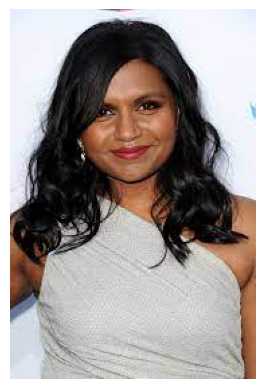

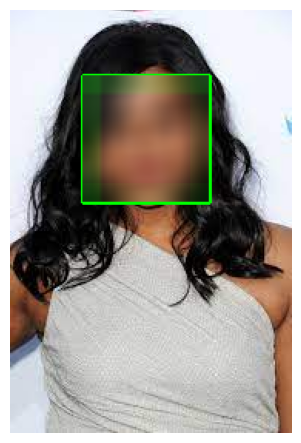

In [31]:
# Importing libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt

# A function for plotting the images


def plotImages(img):
	plt.imshow(img, cmap="gray")
	plt.axis('off')
	plt.style.use('seaborn')
	plt.show()


# Reading an image using OpenCV
# OpenCV reads images by default in BGR format
image = cv2.imread('mindy.jpeg')

# Converting BGR image into a RGB image
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# plotting the original image
plotImages(image)

face_detect = cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_frontalface_alt.xml')
face_data = face_detect.detectMultiScale(image, 1.3, 5)

# Draw rectangle around the faces which is our region of interest (ROI)
for (x, y, w, h) in face_data:
	cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
	roi = image[y:y+h, x:x+w]
	# applying a gaussian blur over this new rectangle area
	roi = cv2.GaussianBlur(roi, (23, 23), 30)
	# impose this blurred image on original image to get final image
	image[y:y+roi.shape[0], x:x+roi.shape[1]] = roi


# Display the output
plotImages(image)


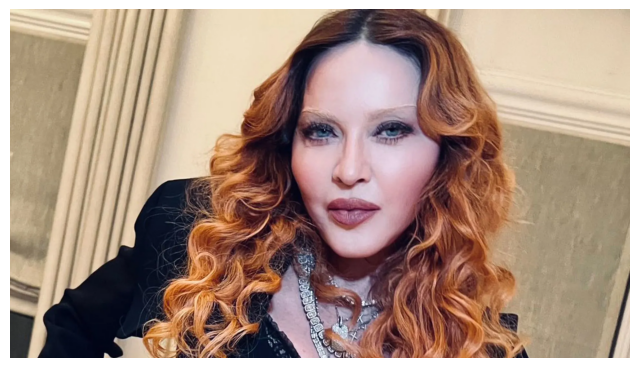

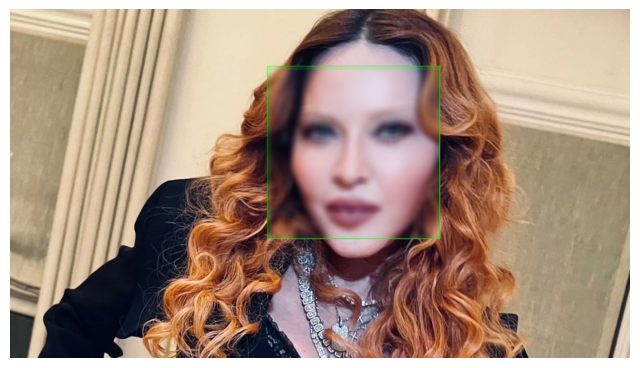

In [32]:
# Importing libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt

# A function for plotting the images


def plotImages(img):
	plt.imshow(img, cmap="gray")
	plt.axis('off')
	plt.style.use('seaborn')
	plt.show()


# Reading an image using OpenCV
# OpenCV reads images by default in BGR format
image = cv2.imread('madonna.jpg')

# Converting BGR image into a RGB image
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# plotting the original image
plotImages(image)

face_detect = cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_frontalface_alt.xml')
face_data = face_detect.detectMultiScale(image, 1.3, 5)

# Draw rectangle around the faces which is our region of interest (ROI)
for (x, y, w, h) in face_data:
	cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
	roi = image[y:y+h, x:x+w]
	# applying a gaussian blur over this new rectangle area
	roi = cv2.GaussianBlur(roi, (23, 23), 30)
	# impose this blurred image on original image to get final image
	image[y:y+roi.shape[0], x:x+roi.shape[1]] = roi


# Display the output
plotImages(image)
